In [6]:

# Install Dependencies

!pip install easyocr requests matplotlib

from google.colab import files
import easyocr
import requests
import matplotlib.pyplot as plt
import cv2




In [15]:
# Upload Image

print("📤 Please upload a product label image...")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]


📤 Please upload a product label image...


Saving sample image.jpeg to sample image (3).jpeg


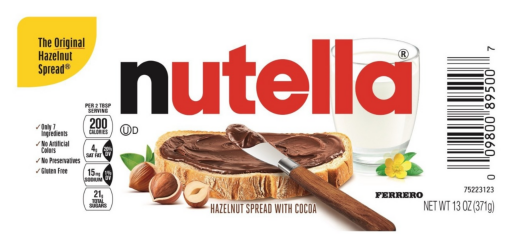


📝 Extracted Text from Image:
- The Original
- Hazelnut
- Spreads
- PSERVTBSP
- nutella
- Onl
- 200
- Ingredients
- CALORIES
- OD
- No Artificial
- Colors
- 49
- 20h
- SAT FAT| DV
- No Preservatives
- Gluten Free
- 153 (&9)
- SODIUM
- 75223123
- 21,
- FERRERO
- sHHHis
- HAZELNut SPREAD WITh COCOA
- NET WT 13 02 (871g)


In [16]:
# OCR Extraction

reader = easyocr.Reader(['en'])
results = reader.readtext(image_path)

img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

extracted_texts = [res[1] for res in results]
print("\n📝 Extracted Text from Image:")
for text in extracted_texts:
    print("-", text)

In [17]:
# Search in Open Food Facts API

def search_product(query):
    url = f"https://world.openfoodfacts.org/cgi/search.pl"
    params = {
        'search_terms': query,
        'search_simple': 1,
        'action': 'process',
        'json': 1,
        'page_size': 1  # get only top result
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        if data.get("products"):
            return data["products"][0]
    return None

In [18]:
product_info = None
for text in extracted_texts:
    product_info = search_product(text)
    if product_info:
        break

# Show Results

if product_info:
    print("\n✅ Product Found in Open Food Facts:")
    print("Product Name:", product_info.get("product_name", "N/A"))
    print("Brand:", product_info.get("brands", "N/A"))
    print("Categories:", product_info.get("categories", "N/A"))
    print("Ingredients:", product_info.get("ingredients_text", "N/A"))
    print("Nutrition Score:", product_info.get("nutrition_grade_fr", "N/A"))
else:
    print("\n❌ No matching product found in Open Food Facts.")


✅ Product Found in Open Food Facts:
Product Name: Bakery Co. 5 The Original Bagels
Brand: New York Bakery Co
Categories: Plant-based foods and beverages,Plant-based foods,Cereals and potatoes,Breads,Special breads,Bagel breads
Ingredients: WHEAT Flour (with added Calcium Carbonate, Iron, Niacin, Thiamin), Water, Sugar, Yeast, Vinegar, Salt, Rapeseed Oil, Preservative (Calcium Propionate), Maize, Sweet potato puree, Malted BARLEY Flour, Flour Treatment Agent (Ascorbic Acid)
Nutrition Score: a
